In [1]:
cd /orange/adamginsburg/jwst/brick/

/blue/adamginsburg/adamginsburg/jwst/brick


In [2]:
%matplotlib inline

In [3]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [4]:
%run $basepath/analysis/analysis_setup.py

/orange/adamginsburg/jwst/brick//reduction/filtering.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
miri_fwhms = Table.read('https://jwst-docs.stsci.edu/jwst-mid-infrared-instrument/miri-performance/miri-point-spread-functions', format='ascii.html')
miri_fwhms

Filter,Wavelength (μm),PSF FWHM (arcsec),PSF FWHM (pixel)
str6,float64,float64,float64
F560W,5.589,0.207,1.882
F770W,7.528,0.269,2.445
F1000W,9.883,0.328,2.982
F1130W,11.298,0.375,3.409
F1280W,12.712,0.42,3.818
F1500W,14.932,0.488,4.436
F1800W,17.875,0.591,5.373
F2100W,20.563,0.674,6.127
F2550W,25.147,0.803,7.3


<Angle [0.06889221, 0.10609502, 0.1275219 , 0.187743  , 0.27079607,
        0.30023354, 0.36379513] arcsec>

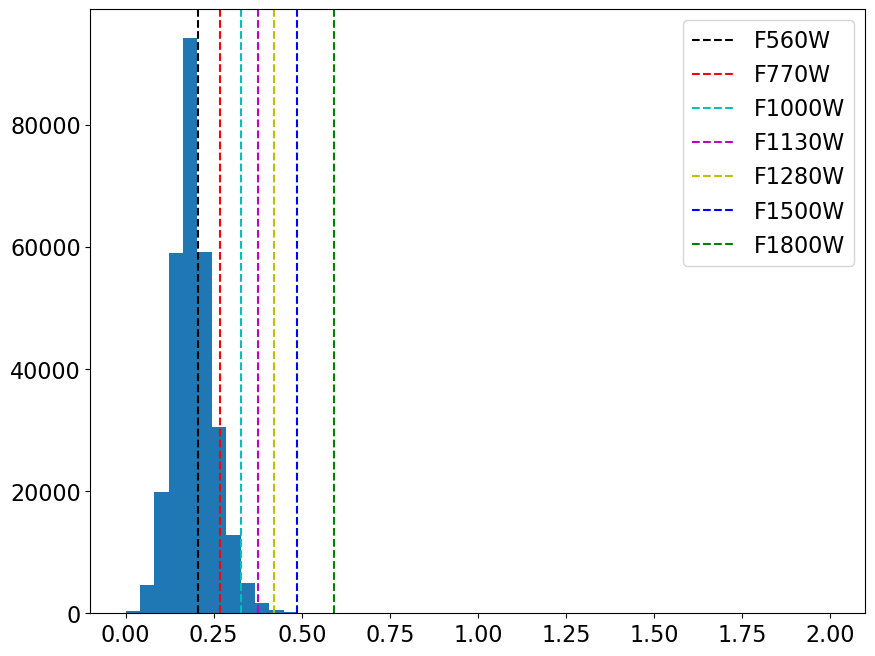

In [6]:
# What is the typical separation between stars?
crdsref = basetable['skycoord_ref']
_, sep, _ = crdsref.match_to_catalog_sky(crdsref, nthneighbor=2)
pl.hist(sep.to(u.arcsec).value, bins=np.linspace(0,2))
for row, color in zip(miri_fwhms, 'krcmybg'):
    pl.axvline(row['PSF FWHM (arcsec)'], label=row['Filter'], linestyle='--', color=color)
pl.legend(loc='best')
np.percentile(sep.to(u.arcsec), [1,5,10,50,90,95,99])

<Angle [0.20503305, 0.23900485, 0.25923191, 0.34146546, 0.44709155,
        0.48244168, 0.5571697 ] arcsec>

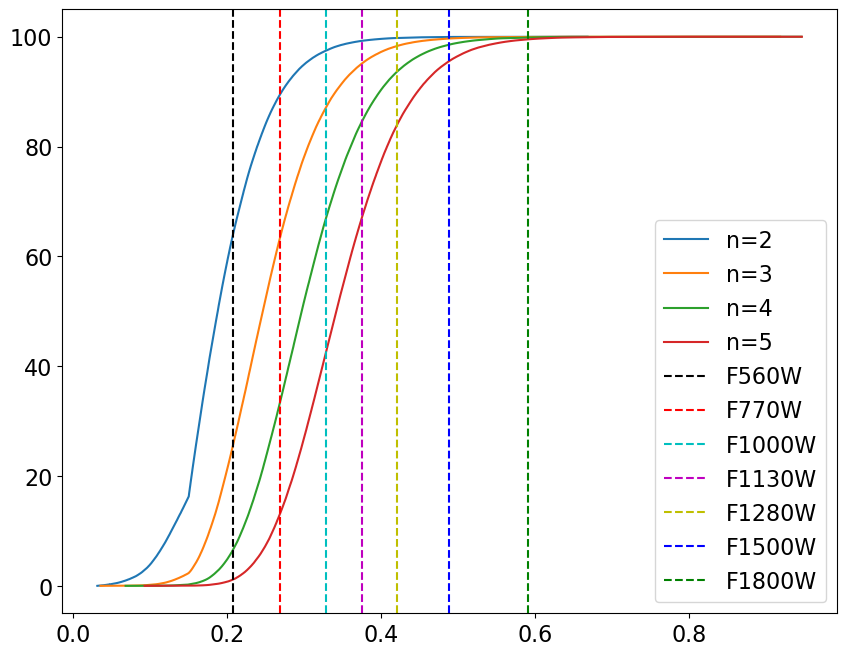

In [7]:
# What is the typical separation between stars?
crdsref = basetable['skycoord_ref']
for neighbor in (2,3,4,5):
    _, sep, _ = crdsref.match_to_catalog_sky(crdsref, nthneighbor=neighbor)
    pl.plot(np.sort(sep.to(u.arcsec).value), np.arange(len(sep))/len(sep)*100, label=f'n={neighbor}')
for row, color in zip(miri_fwhms, 'krcmybg'):
    pl.axvline(row['PSF FWHM (arcsec)'], label=row['Filter'], linestyle='--', color=color)
pl.legend(loc='best')
np.percentile(sep.to(u.arcsec), [1,5,10,50,90,95,99])

In [8]:
polyreg = regions.Regions.read(f'{basepath}/regions/dark_innerbrick_polygon.reg')[0]
polyreg2 = regions.Regions.read(f'{basepath}/regions/brick_polygon.reg')[0]

In [9]:
# What is the typical separation between stars within the brick?
crdsref = basetable['skycoord_ref']
crds_poly = crdsref[polyreg.contains(crdsref, ww)]
for neighbor in (2,3,4,5):
    _, sep, _ = crds_poly.match_to_catalog_sky(crds_poly, nthneighbor=neighbor)
    pl.plot(np.sort(sep.to(u.arcsec).value), np.arange(len(sep))/len(sep)*100, label=f'n={neighbor}')
for row, color in zip(miri_fwhms, 'krcmybg'):
    pl.axvline(row['PSF FWHM (arcsec)'], label=row['Filter'], linestyle='--', color=color)
pl.legend(loc='best')
np.percentile(sep.to(u.arcsec), [1,5,10,50,90,95,99])

NameError: name 'ww' is not defined

In [ ]:
# What is the typical separation between stars within the dark part of the brick?
crdsref = basetable['skycoord_ref']
crds_poly = crdsref[polyreg2.contains(crdsref, ww)]
for neighbor in (2,3,4,5):
    _, sep, _ = crds_poly.match_to_catalog_sky(crds_poly, nthneighbor=neighbor)
    pl.plot(np.sort(sep.to(u.arcsec).value), np.arange(len(sep))/len(sep)*100, label=f'n={neighbor}')
for row, color in zip(miri_fwhms, 'krcmybg'):
    pl.axvline(row['PSF FWHM (arcsec)'], label=row['Filter'], linestyle='--', color=color)
pl.legend(loc='best')
np.percentile(sep.to(u.arcsec), [1,5,10,50,90,95,99])

In [ ]:
# What is the typical separation between stars at shorter wavelength?
crds182 = basetable['skycoord_f182m']
_, sep, _ = crds182.match_to_catalog_sky(crds182, nthneighbor=2)
pl.hist(sep.to(u.arcsec).value, bins=np.linspace(0,2))
for row, color in zip(miri_fwhms, 'krcmybg'):
    pl.axvline(row['PSF FWHM (arcsec)'], label=row['Filter'], linestyle='--', color=color)
pl.legend(loc='best')
np.percentile(sep.to(u.arcsec), [1,5,10,50,90,95,99])